In [1]:
# 使用前面所学的知识，综合起来，对鸢尾花数据集做个二分类
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

sess = tf.Session()

In [2]:
iris = datasets.load_iris()

In [8]:
iris

{'DESCR': 'Iris Plants Database\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ====================\n\n

In [9]:
y_vals = np.array([1. if x == 0 else 0. for x in iris.target])  # setosa标签为1，否则为0
print(y_vals)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [10]:
# 使用两个自变量，分别是petal length和petal width
x_vals = np.array([[x[2], x[3]] for x in iris.data])
print(x_vals[:5])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


In [11]:
# 设置批次大小，占位符和变量
batch_size = 20

x1_data = tf.placeholder(tf.float32, shape=[None, 1])
x2_data = tf.placeholder(tf.float32, shape=[None, 1])
y_data = tf.placeholder(tf.float32, shape=[None, 1])
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

In [12]:
# 构建计算图
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_out = tf.subtract(x1_data, my_add)

In [13]:
# 损失函数
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_out, labels=y_data)
# 优化器
opt = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

In [46]:
# 初始化变量
init = tf.global_variables_initializer()
sess.run(init)

In [47]:
# 训练
for i in range(1000):
    rand_index = np.random.choice(len(y_vals), batch_size)
    rand_x = x_vals[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in y_vals[rand_index]])
    sess.run(opt, feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_data: rand_y})
    if (i + 1) % 200 == 0:
        A_, b_ = sess.run([A, b], feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_data: rand_y})
        print('Step {0}: A={1}, b={2}'.format(i+1, A_, b_))
print('Finished!')

Step 200: A=[[8.577146]], b=[[-3.4543862]]
Step 400: A=[[10.208668]], b=[[-4.5898657]]
Step 600: A=[[11.0947485]], b=[[-5.4379387]]
Step 800: A=[[11.905293]], b=[[-5.8302116]]
Step 1000: A=[[12.306698]], b=[[-6.509454]]
Finished!


In [48]:
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)
print(slope)
print(intercept)

12.306698
-6.509454


In [49]:
x = np.linspace(0, 3, 50)
print(x)

[0.         0.06122449 0.12244898 0.18367347 0.24489796 0.30612245
 0.36734694 0.42857143 0.48979592 0.55102041 0.6122449  0.67346939
 0.73469388 0.79591837 0.85714286 0.91836735 0.97959184 1.04081633
 1.10204082 1.16326531 1.2244898  1.28571429 1.34693878 1.40816327
 1.46938776 1.53061224 1.59183673 1.65306122 1.71428571 1.7755102
 1.83673469 1.89795918 1.95918367 2.02040816 2.08163265 2.14285714
 2.20408163 2.26530612 2.32653061 2.3877551  2.44897959 2.51020408
 2.57142857 2.63265306 2.69387755 2.75510204 2.81632653 2.87755102
 2.93877551 3.        ]


In [50]:
ablineVals = []
for i in x:
    ablineVals.append(slope * i + intercept)
print(ablineVals)

[-6.509453773498535, -5.755982476837781, -5.002511180177027, -4.249039883516273, -3.495568586855519, -2.7420972901947644, -1.9886259935340105, -1.2351546968732565, -0.48168340021250255, 0.2717878964482514, 1.0252591931090063, 1.7787304897697602, 2.532201786430514, 3.285673083091268, 4.039144379752022, 4.792615676412778, 5.54608697307353, 6.299558269734286, 7.053029566395038, 7.806500863055794, 8.559972159716548, 9.3134434563773, 10.066914753038056, 10.820386049698811, 11.573857346359564, 12.32732864302032, 13.080799939681071, 13.834271236341827, 14.58774253300258, 15.341213829663335, 16.09468512632409, 16.848156422984843, 17.601627719645595, 18.355099016306347, 19.108570312967107, 19.86204160962786, 20.61551290628861, 21.36898420294937, 22.122455499610123, 22.875926796270875, 23.62939809293163, 24.382869389592383, 25.136340686253135, 25.88981198291389, 26.643283279574646, 27.396754576235395, 28.150225872896158, 28.903697169556906, 29.657168466217662, 30.410639762878418]


In [58]:
setosa_x = [a[1] for i, a in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [a[0] for i, a in enumerate(x_vals) if y_vals[i] == 1]

In [60]:
non_setosa_x = [a[1] for i, a in enumerate(x_vals) if y_vals[i] == 0]
non_setosa_y = [a[0] for i, a in enumerate(x_vals) if y_vals[i] == 0]

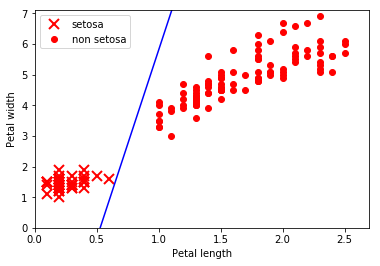

In [68]:
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='non setosa')
plt.plot(x, ablineVals, 'b-')
plt.xlim([0., 2.7])
plt.ylim([0., 7.1])
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend()
plt.show()